<a href="https://colab.research.google.com/github/neerajaeedara9/Liver-disease-detection-using-machine-learning/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

In [112]:
dataset =pd.read_csv('indian_liver_patient.csv')

In [113]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [114]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [115]:
dataset.shape

(583, 11)

In [116]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

# **data cleaning checking duplicate tuples, if any will be removed**

In [117]:
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
578,False
579,False
580,False
581,False


In [118]:
dataset.duplicated().sum()

np.int64(13)

In [119]:
dataset=dataset.drop_duplicates()
print(dataset.shape)

(570, 11)


# **Checking Missing Values**



In [120]:
dataset.isna().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


<Axes: xlabel='Albumin_and_Globulin_Ratio'>

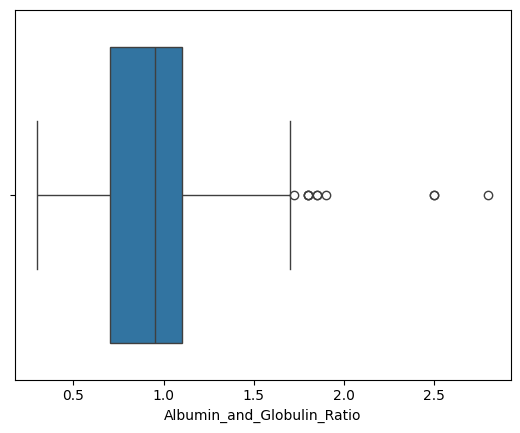

In [121]:
sns.boxplot(data = dataset, x='Albumin_and_Globulin_Ratio')

In [122]:
dataset['Albumin_and_Globulin_Ratio'].mode()

,Albumin_and_Globulin_Ratio
0,1.0


In [123]:
dataset['Albumin_and_Globulin_Ratio'].median()

0.95

In [124]:
dataset['Albumin_and_Globulin_Ratio'].mean()

np.float64(0.9480035335689044)

In [125]:
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [126]:
dataset.isna().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


# Male Vs **Female**

<Axes: xlabel='Gender', ylabel='count'>

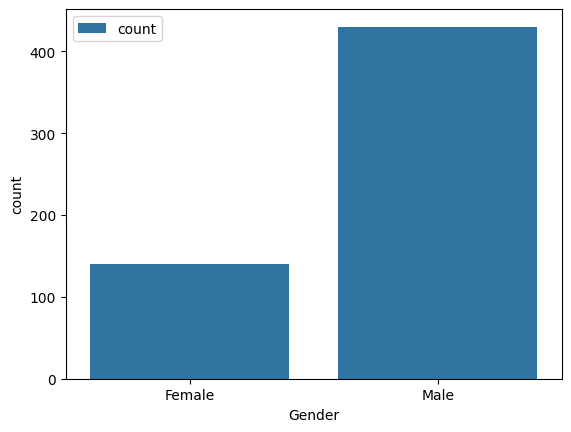

In [127]:
import seaborn as sns
sns.countplot(data=dataset,x='Gender',label='count')

In [128]:
Male, Female =dataset['Gender'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are female',Female)

Number of patients that are male:  430
Number of patients that are female 140


Encoding the Gender Column

# Label Male as 1 and Female as 0



In [129]:
def partition(x):
  if x=='Male':
    return 1
  return 0

dataset['Gender']=dataset['Gender'].map(partition)


In [130]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Converting Output Column 'dataset'to 0's and 1's

# dataset i.e output value has '1' for liver disease and '2' for no liver disease so lets make it 0 for no disease to make it convinent **bold text**



In [131]:
def partition(x):
  if x==2:
    return 0
  return 1

dataset['Dataset']=dataset['Dataset'].map(partition)

In [132]:
dataset['Dataset']

,Dataset
0,1
1,1
2,1
3,1
4,1
...,...
578,0
579,1
580,1
581,1


**Correlation Matrix**

<Axes: >

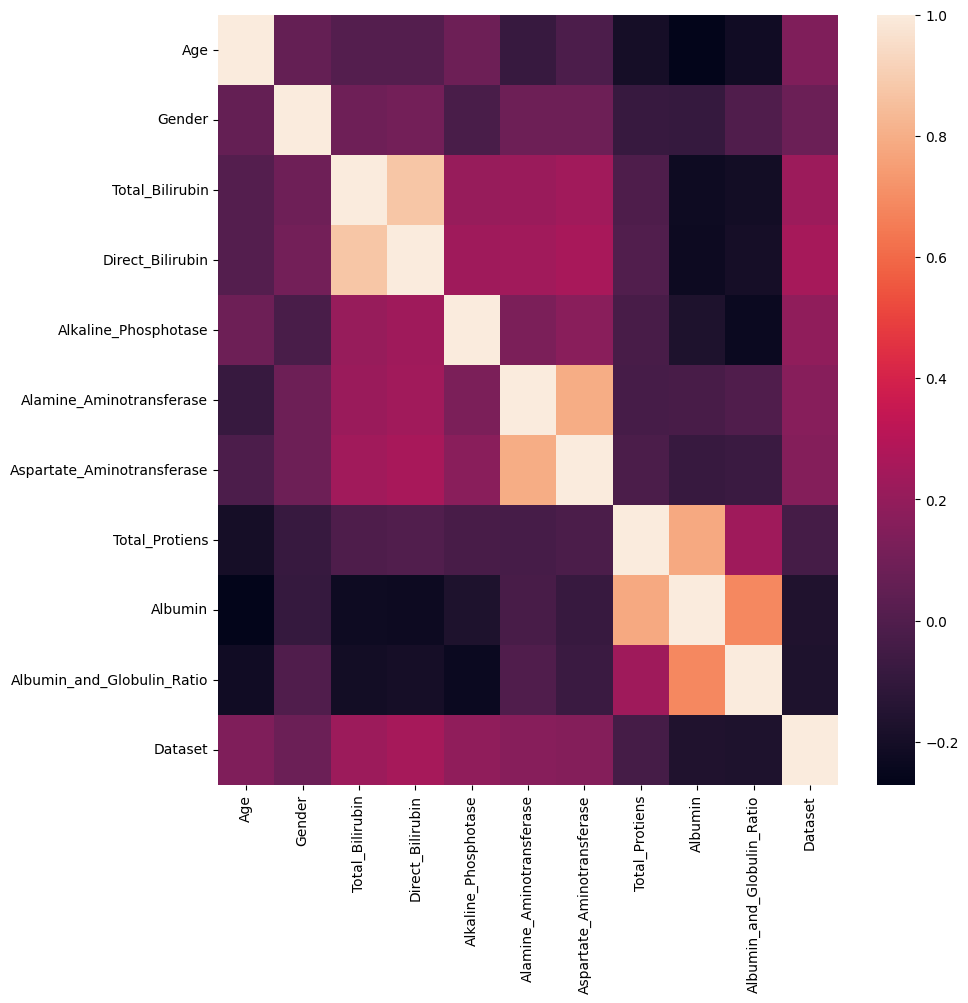

In [133]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

**Data** **Preparation**

In [134]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


#splitting data into training data and test **data**

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#Feature Scaling

In [136]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


Machine Learning Models

LOGISTIC **REGRESSION**

In [137]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(random_state=0)
log_classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [138]:
dataset.isna().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [139]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [141]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [142]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(random_state=0)
log_classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [143]:
log_y_pred=log_classifier.predict(x_test)

<Axes: >

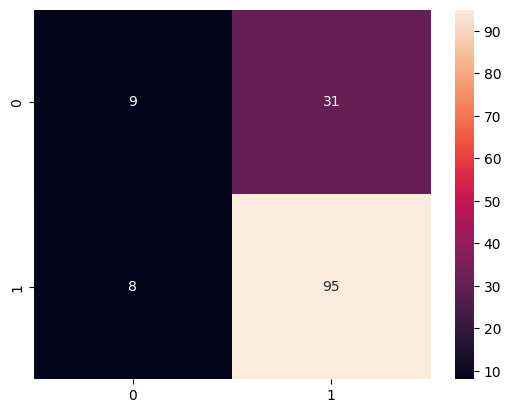

In [144]:
from sklearn.metrics import confusion_matrix
log_cm=confusion_matrix(y_test, log_y_pred)
sns.heatmap(log_cm, annot=True)

In [145]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,log_y_pred))
print(precision_score(y_test,log_y_pred))

0.7272727272727273
0.753968253968254


#predicting the output

In [146]:
log_y_pred=log_classifier.predict(x_test)

<Axes: >

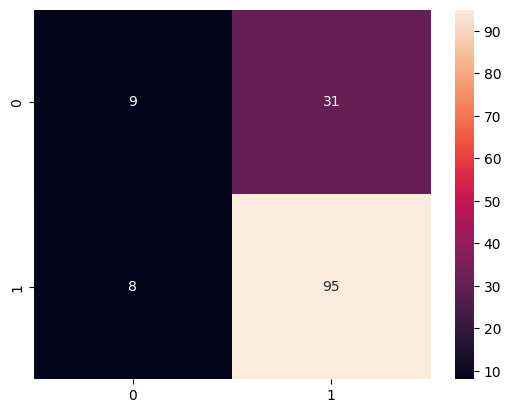

In [147]:
from sklearn.metrics import confusion_matrix
log_cm=confusion_matrix(y_test, log_y_pred)
sns.heatmap(log_cm, annot=True)

Accuracy:The accuracy of a classifier is the percentage of the test set that are correctly classsified by the classifier. Accuracy=n0.of TP+no.of TN/no.of TP+FP+FN+TN

Sensitivity:sensitivity is also referred as True position rate i.e.the proportion of positive tuples that are correctly identified Sensitivity=no.of TP/no.of TP+no.of FN

Precision:Precision is defined as the properties of the true positives against as all the positive results(both True Positives and False Positives) Prescision=no.of TP/no.of TP+FP Specificity:Specificity is the True negative rate that is the properties of negative tuples that are correctly identified Specificity=no.of TN/No.of TN+FP



In [148]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,log_y_pred))
print(precision_score(y_test,log_y_pred))

0.7272727272727273
0.753968253968254


**K** **Nearest** **Neighbors** **Algorithm**

In [149]:
x_train.shape

(427, 10)

In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=21,metric='minkowski')
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [151]:
knn_y_pred=knn_classifier.predict(x_test)


<Axes: >

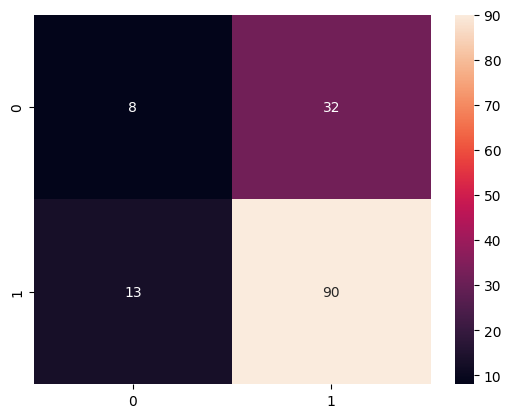

In [152]:
from sklearn.metrics import confusion_matrix
knn_cm=confusion_matrix(y_test,knn_y_pred)
sns.heatmap(knn_cm,annot=True)

In [153]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,knn_y_pred))
print(precision_score(y_test,knn_y_pred))

0.6853146853146853
0.7377049180327869


**Support** **Vector** **Machine**

In [154]:
from sklearn.svm import SVC
svm_classifier=SVC(kernel='rbf',random_state=0)
svm_classifier.fit(x_train,y_train)

SVC(random_state=0)

In [155]:
svm_y_pred=svm_classifier.predict(x_test)

<Axes: >

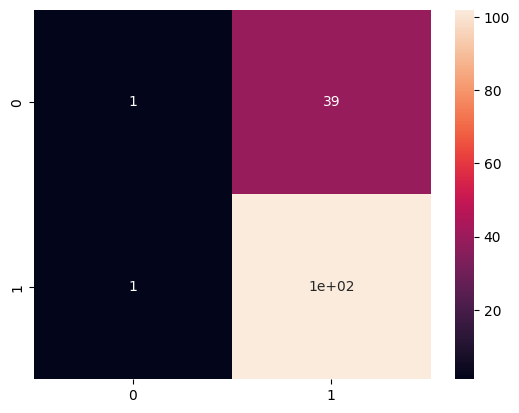

In [156]:
from sklearn.metrics import confusion_matrix
svm_cm=confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm,annot=True)

In [157]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_test,svm_y_pred))
print(precision_score(y_test,svm_y_pred))

0.7202797202797203
0.723404255319149


**Artificial** **Neural** **Network**

In [158]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [159]:
#Initialising the ANN
classifier = Sequential()
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=400,activation='relu',input_dim=10))
classifier.add(Dropout(rate=0.1))
#Adding second hidden layer
classifier.add(Dense(units=400,activation='relu'))
classifier.add(Dropout(rate=0.1))
#Output layer
classifier.add(Dense(units=1 , activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [160]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [161]:
classifier.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6323 - loss: 0.6068
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7120 - loss: 0.5379
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7055 - loss: 0.5031
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7260 - loss: 0.5169
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.4653
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7551 - loss: 0.4533
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7879 - loss: 0.4301
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7533 - loss: 0.4668
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7597 - loss: 0.4418
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7757 - loss: 0.4341
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7466 - loss: 0.4636
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - ac

In [162]:
ann_y_pred=classifier.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [163]:
ann_y_pred[0]

array([0.7198779], dtype=float32)

In [164]:
ann_y_pred=ann_y_pred>=0.5

<Axes: >

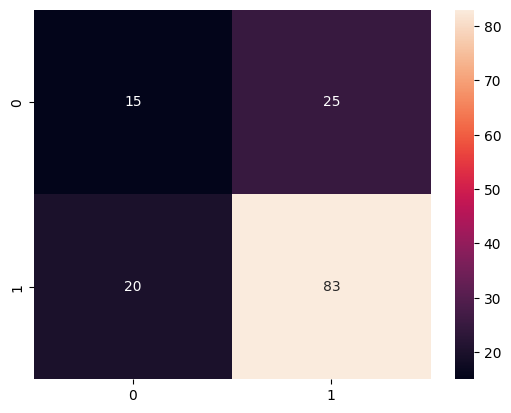

In [165]:
from sklearn.metrics import confusion_matrix
ann_cm=confusion_matrix(y_test, ann_y_pred)
sns.heatmap(ann_cm,annot=True)

In [166]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,ann_y_pred))
print(precision_score(y_test,ann_y_pred))

0.6853146853146853
0.7685185185185185


**Saving** **the** **models**

In [167]:
import pickle
pickle.dump(knn_classifier, open('model.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))
